In [1]:
%reload_ext autoreload
%autoreload 2

# Logistic Regression

- Supervised learning algorithm for classification.
- Predicts a binary outcome based on one or more independent variables.
- Uses a linear combination of the features (predictors) with coefficients (weights) to make predictions.

### Classification example - churn prediction

In [19]:
import itertools
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [20]:
df_churn_pd = pd.read_csv("/data/IFI8410/sess09/mergedcustomers_missing_values_GENDER.csv")
df_churn_pd.head()

,ID,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
0,1703,Medium,NaN,M,2,28766.9,N,47,6110.61,58,1527.6525,152.76525,8.70,2,13,0.0000,152.76525
1,1704,Low,NaN,M,2,91272.2,Y,25,26992.70,13,13496.3500,1349.63500,3.25,4,10,1349.6350,0.00000
2,1705,Low,NaN,S,0,73228.3,N,42,22472.25,28,11236.1250,1123.61250,7.00,4,5,1123.6125,0.00000
3,1706,High,M,M,1,64792.3,N,52,13051.31,36,6525.6550,652.56550,9.00,3,6,0.0000,652.56550
4,1707,High,F,S,0,93322.1,Y,40,29922.99,8,14961.4950,1496.14950,2.00,4,9,0.0000,1496.14950


In [21]:
print("The dataset contains columns of the following data types : \n" +str(df_churn_pd.dtypes))

The dataset contains columns of the following data types : 
ID                             int64
CHURNRISK                     object
GENDER                        object
STATUS                        object
CHILDREN                       int64
ESTINCOME                    float64
HOMEOWNER                     object
AGE                            int64
TOTALDOLLARVALUETRADED       float64
TOTALUNITSTRADED               int64
LARGESTSINGLETRANSACTION     float64
SMALLESTSINGLETRANSACTION    float64
PERCENTCHANGECALCULATION     float64
DAYSSINCELASTLOGIN             int64
DAYSSINCELASTTRADE             int64
NETREALIZEDGAINS_YTD         float64
NETREALIZEDLOSSES_YTD        float64
dtype: object


Each category within the churnrisk column has the following count : 
CHURNRISK
High      983
Low       699
Medium    384
dtype: int64


Text(0, 0.5, 'Frequency')

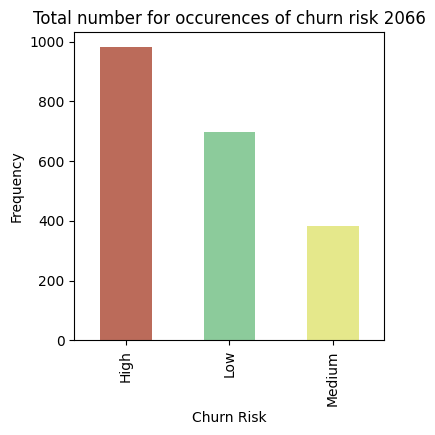

In [22]:
print( "Each category within the churnrisk column has the following count : ")
print(df_churn_pd.groupby(['CHURNRISK']).size())
#bar chart to show split of data
index = ['High','Medium','Low']
churn_plot = df_churn_pd['CHURNRISK'].value_counts(sort=True, ascending=False).plot(kind='bar',figsize=(4,4),title="Total number for occurences of churn risk " + str(df_churn_pd['CHURNRISK'].count()), color=['#BB6B5A','#8CCB9B','#E5E88B'])
churn_plot.set_xlabel("Churn Risk")
churn_plot.set_ylabel("Frequency")

#### Data pre-processing and feature transformations

In [23]:
#remove columns that are not required
df_churn_pd = df_churn_pd.drop(['ID'], axis=1)

In [24]:
# Defining the categorical columns 
categoricalColumns = ['GENDER', 'STATUS', 'HOMEOWNER']

print("Categorical columns : " )
print(categoricalColumns)

impute_categorical = SimpleImputer(strategy="most_frequent")
onehot_categorical =  OneHotEncoder(handle_unknown='ignore')

categorical_transformer = Pipeline(steps=[('impute',impute_categorical),('onehot',onehot_categorical)])

Categorical columns : 
['GENDER', 'STATUS', 'HOMEOWNER']


In [25]:
# Defining the numerical columns 
numericalColumns = df_churn_pd.select_dtypes(include=[float,int]).columns

print("Numerical columns : " )
print(numericalColumns)

scaler_numerical = StandardScaler()

numerical_transformer = Pipeline(steps=[('scale',scaler_numerical)])

Numerical columns : 
Index(['CHILDREN', 'ESTINCOME', 'AGE', 'TOTALDOLLARVALUETRADED',
       'TOTALUNITSTRADED', 'LARGESTSINGLETRANSACTION',
       'SMALLESTSINGLETRANSACTION', 'PERCENTCHANGECALCULATION',
       'DAYSSINCELASTLOGIN', 'DAYSSINCELASTTRADE', 'NETREALIZEDGAINS_YTD',
       'NETREALIZEDLOSSES_YTD'],
      dtype='object')


In [26]:
preprocessorForCategoricalColumns = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categoricalColumns)],
    remainder="passthrough")

preprocessorForAllColumns = ColumnTransformer(
    transformers=[
    ('cat', categorical_transformer, categoricalColumns),
    ('num', numerical_transformer, numericalColumns)
    ], remainder="passthrough")

In [27]:
# The transformation happens in the pipeline. Temporarily done here to show what intermediate value looks like
df_churn_pd_temp = preprocessorForCategoricalColumns.fit_transform(df_churn_pd)
print("Data after transforming :")
print(df_churn_pd_temp)

df_churn_pd_temp_2 = preprocessorForAllColumns.fit_transform(df_churn_pd)
print("Data after transforming :")
print(df_churn_pd_temp_2)

Data after transforming :
[[1.0 0.0 0.0 ... 13 0.0 152.76525]
 [1.0 0.0 0.0 ... 10 1349.635 0.0]
 [1.0 0.0 0.0 ... 5 1123.6125 0.0]
 ...
 [1.0 0.0 0.0 ... 11 0.0 82.50825]
 [1.0 0.0 0.0 ... 5 930.093 0.0]
 [0.0 1.0 0.0 ... 8 1041.604 0.0]]
Data after transforming :
[[1.0 0.0 0.0 ... -0.6792731303453047 -0.5106065181930338 'Medium']
 [1.0 0.0 0.0 ... 1.8354629319820521 -0.7959345330293706 'Low']
 [1.0 0.0 0.0 ... 1.4143217110983428 -0.7959345330293706 'Low']
 ...
 [1.0 0.0 0.0 ... -0.6792731303453047 -0.6418293606808149 'Medium']
 [1.0 0.0 0.0 ... 1.053742394902809 -0.7959345330293706 'Low']
 [0.0 1.0 0.0 ... 1.261517632686496 -0.7959345330293706 'Low']]


In [28]:
# prepare data frame for splitting data into train and test datasets
features = []
features = df_churn_pd.drop(['CHURNRISK'], axis=1)

label_churn = pd.DataFrame(df_churn_pd, columns = ['CHURNRISK']) 
label_encoder = LabelEncoder()

df_churn_pd.loc[df_churn_pd['CHURNRISK'] == 'Medium', 'CHURNRISK'] = 'High'

label = df_churn_pd['CHURNRISK']

class_names = label.unique()
print("Unique target labels : ", class_names) 

label = label_encoder.fit_transform(label)

print("Encoded value of Churnrisk after applying label encoder : " + str(label))

Unique target labels :  ['High' 'Low']
Encoded value of Churnrisk after applying label encoder : [0 1 1 ... 0 1 1]


#### Split into training and test (holdout) data set 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=0)

print("Dimensions of datasets that will be used for training : Input features"+str(X_train.shape)+ 
      " Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features"+str(X_test.shape)+ 
      " Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(1549, 15) Output label(1549,)
Dimensions of datasets that will be used for testing : Input features(517, 15) Output label(517,)


#### Classification training and prediction 

In [30]:
from sklearn.linear_model import LogisticRegression

model_name = "Logistic Regression Classifier"

logisticRegressionClassifier = LogisticRegression(
    random_state=0,multi_class='auto',solver='lbfgs',max_iter=1000
)

lrc_model = Pipeline(steps=[('preprocessor', preprocessorForCategoricalColumns),
                            ('classifier', logisticRegressionClassifier)]) 

lrc_model.fit(X_train, y_train)

y_pred_lrc = lrc_model.predict(X_test)

In [31]:
# y_test = label_encoder.inverse_transform(y_test)
# y_pred_lrc = label_encoder.inverse_transform(y_pred_lrc)

#### Classification evaluation

In [32]:
# Evaluate the model on the test set
accuracy = lrc_model.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

Test accuracy: 1.00


In [33]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lrc)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test, y_pred_lrc)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_pred_lrc)
print(f"Recall: {recall:.2f}")

# Calculate F1-score
f1_score = f1_score(y_test, y_pred_lrc)
print(f"F1-score: {f1_score:.2f}")

Accuracy: 1.00
Precision: 0.99
Recall: 1.00
F1-score: 0.99


In [36]:
print(classification_report(y_test, y_pred_lrc, target_names=class_names))

              precision    recall  f1-score   support

        High       1.00      0.99      1.00       347
         Low       0.99      1.00      0.99       170

    accuracy                           1.00       517
   macro avg       0.99      1.00      1.00       517
weighted avg       1.00      1.00      1.00       517



#### Confusion matrix

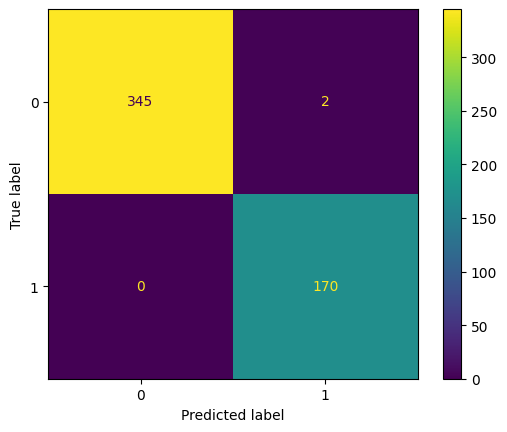

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lrc)

Confusion matrix, without normalization
[[345   2]
 [  0 170]]
Normalized confusion matrix
[[0.99 0.01]
 [0.   1.  ]]


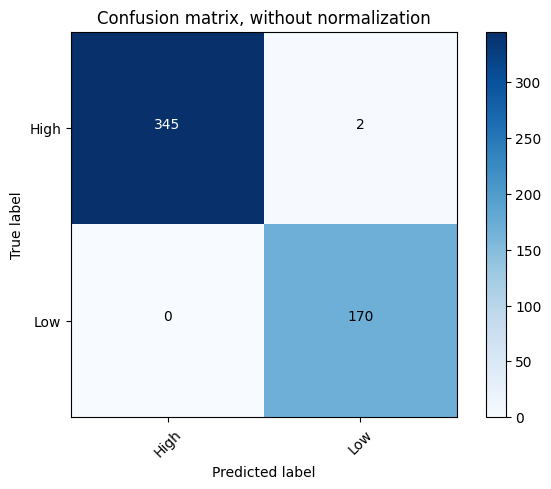

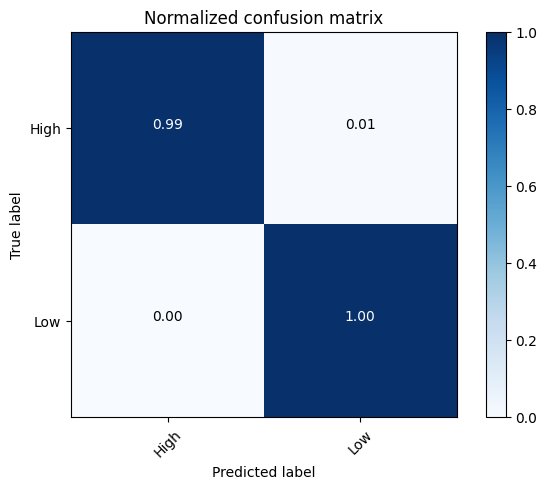

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_lrc)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Precision-Recall Curve

In [39]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lrc)

No handles with labels found to put in legend.


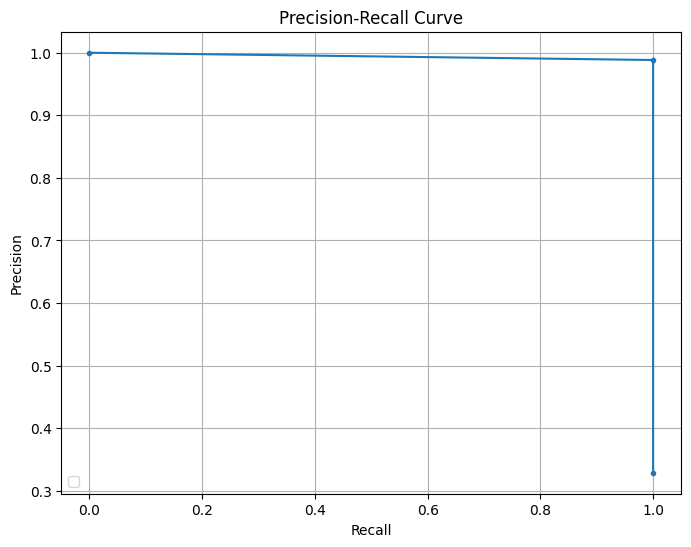

In [40]:
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

#### ROC Curve

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lrc)
roc_auc = roc_auc_score(y_test, y_pred_lrc)

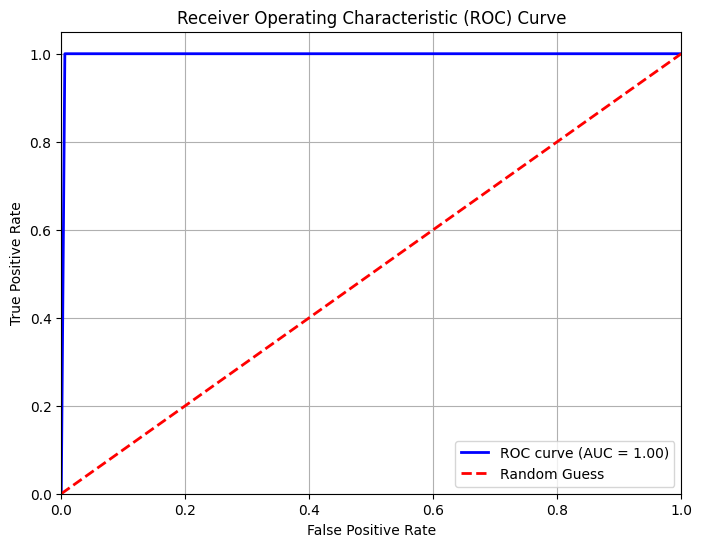

In [42]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()